# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari https:/www.bisnis.com/

## Sport

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date, timedelta

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('article', class_='detailsContent force-17 mt40').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://www.bisnis.com/index?c=392&d={}"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.strftime('%Y-%m-%d'))
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('div', class_='col-sm-8')

            for element in news_elements:
                title = element.find('h2').a.text.strip()
                article_url = element.find('h2').a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data = scrape_news_data(start_date, end_date)

In [27]:
# Create a pandas DataFrame from the scraped data
df = pd.DataFrame(news_data)

In [28]:
df['Title'] = df['Title'].str.replace('\n', '')

In [29]:
df['Label'] = 'Sport'


In [30]:
df

,Date,Title,Content,Label
0,01-10-2023,Prediksi Skor Atalanta vs Juventus: Head to He...,"Bisnis.com, SOLO - Duel Atalanta vs Juventus a...",Sport
1,01-10-2023,Hasil Drawing dan Jadwal Bulu Tangkis Asian Ga...,"Bisnis.com, SOLO - Hasil drawing dan jadwal bu...",Sport
2,01-10-2023,"Naik Podium MotoGP Setelah Setahun Absen, Marc...","Bisnis.com, JAKARTA - Pembalap Repsol Honda, M...",Sport
3,01-10-2023,"Prediksi Skor Persib vs Persita: Head to Head,...","Bisnis.com, SOLO - Persib vs Persita akan menj...",Sport
4,01-10-2023,"Prediksi Persib vs Persita, Pelatih Minta Maun...","Bisnis.com, JAKARTA - Jelang Persib vs Persita...",Sport
...,...,...,...,...
389,01-11-2023,Demam Megawati di Korea Bikin Ofisial Red Spar...,"Bisnis.com, SOLO - Dunia voli Korea Selatan di...",Sport
390,01-11-2023,Jadwal Hylo Open Hari Ini: PraMel Lawan Christ...,"Bisnis.com, SOLO - Jadwal Hylo Open 2023 akan ...",Sport
391,01-11-2023,Jadwal Liga 1 Pekan 18: Madura United vs Persi...,"Bisnis.com, SOLO - Jadwal Liga 1 2023-2024 pek...",Sport
392,01-11-2023,Jadwal Piala Liga Inggris: Manchester United v...,"Bisnis.com, SOLO - Jadwal Piala Liga Inggris a...",Sport


In [6]:
# Save the DataFrame to a CSV file
df.to_csv('bisnis_sports_news.csv', index=False)

## Jakarta

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date, timedelta

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('article', class_='detailsContent force-17 mt40').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://www.bisnis.com/index?c=382&d={}"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.strftime('%Y-%m-%d'))
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('div', class_='col-sm-8')

            for element in news_elements:
                title = element.find('h2').a.text.strip()
                article_url = element.find('h2').a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data_1= scrape_news_data(start_date, end_date)

In [11]:
# Create a pandas DataFrame from the scraped data
df2 = pd.DataFrame(news_data_1)

# Save the DataFrame to a CSV file
df2.to_csv('bisnis_jakarta_news.csv', index=False)

In [12]:
df2['Title'] = df2['Title'].str.replace('\t', '')
df2['Content'] = df2['Content'].str.replace('\n', '')

In [14]:
df2['Label'] = 'Jakarta'

In [15]:
df2['Title'] = df2['Title'].str.replace('\n', '')
df2

,Date,Title,Content,Label
0,02-10-2023,"Wilayah Jaksel dan Jaktim Terancam Longsor, In...","Bisnis.com, JAKARTA - Badan Penanggulangan Ben...",Jakarta
1,02-10-2023,Transjakarta Perbarui Layanan Non-BRT dan Mikr...,"Bisnis.com, JAKARTA - BUMD DKI PT Transportasi...",Jakarta
2,02-10-2023,"Ada Demo di Kawasan Patung Kuda, Transjakarta ...","Bisnis.com, JAKARTA — BUMD DKI PT Transportasi...",Jakarta
3,02-10-2023,"Cuaca Jakarta Hari Ini, 2 Oktober, Cerah Berawan","Bisnis.com, JAKARTA – Badan Meteorologi Klimat...",Jakarta
4,03-10-2023,Heru Budi Bentuk Timsus Penyempurnaan RUU Daer...,"Bisnis.com, JAKARTA — Penjabat (Pj) Gubernur D...",Jakarta
...,...,...,...,...
92,31-10-2023,"Daftar Lokasi Uji Emisi di Jakarta, Segera ke ...","Bisnis.com, JAKARTA — Pemerintah Provinsi (Pem...",Jakarta
93,31-10-2023,"Cuaca Jabodetabek 31 Oktober: Jakarta Berawan,...","Bisnis.com, JAKARTA - Prakiraan cuaca Jakarta,...",Jakarta
94,01-11-2023,"Food Station Gandeng Kejaksaan, Pastikan GCG d...","Bisnis.com, JAKARTA - PT Food StationTjipinang...",Jakarta
95,01-11-2023,Jadwal Dan Lokasi SIM Keliling di Jakarta Hari...,"Bisnis.com, JAKARTA - Polda Metro Jaya (PMJ) m...",Jakarta


In [33]:
df2.to_csv('bisnis_jakarta_news.csv', index=False)

## Surabaya

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date, timedelta

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('article', class_='detailsContent force-17 mt40').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://www.bisnis.com/index?c=526&d={}"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.strftime('%Y-%m-%d'))
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('div', class_='col-sm-8')

            for element in news_elements:
                title = element.find('h2').a.text.strip()
                article_url = element.find('h2').a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data_2= scrape_news_data(start_date, end_date)

In [19]:
# Create a pandas DataFrame from the scraped data
df3 = pd.DataFrame(news_data_2)

In [20]:
df3['Title'] = df3['Title'].str.replace('\t', '')
df3['Content'] = df3['Content'].str.replace('\n', '')

In [21]:
df3['Label'] = 'Surabaya'

In [22]:
df3['Title'] = df3['Title'].str.replace('\n', '')
df3

,Date,Title,Content,Label
0,02-10-2023,"Sumur Warga di Kediri Tercemar Minyak, Begini ...","Bisnis.com, KEDIRI - PT Pertamina menyebut tel...",Surabaya
1,02-10-2023,Realisasi Giling Tebu PG Assembagoes 80 Persen...,"Bisnis.com, SITUBONDO - Pabrik Gula (PG) Assem...",Surabaya
2,02-10-2023,Pasar Induk Among Tani Kota Batu Beroperasi pe...,"Bisnis.com, BATU - Pasar Induk Among Tani Kota...",Surabaya
3,02-10-2023,Transaksi UMKM Syariah di Fesyar Jawa 2023 Cap...,"Bisnis.com, SURABAYA — Bank Indonesia - Jawa T...",Surabaya
4,02-10-2023,"Tingkat Hunian Hotel di Kota Malang Capai 56,3...","Bisnis.com, MALANG—Tingkat hunian hotel di Kot...",Surabaya
...,...,...,...,...
134,01-11-2023,"Kemiskinan di Kota Malang Turun Jadi 4,26% Tah...","Bisnis.com, MALANG — Kemiskinan di Kota Malang...",Surabaya
135,01-11-2023,Tingkat Penghunian Kamar Hotel di Malang Tembu...,"Bisnis.com, MALANG — Tingkat penghunian kamar ...",Surabaya
136,01-11-2023,Beras Masih Jadi Penyumbang Utama Inflasi di K...,"Bisnis.com, MALANG — Beras masih menjadi penyu...",Surabaya
137,01-11-2023,Pertamina Catat Ada 32 Kasus Pidana Penyalahgu...,"Bisnis.com, SURABAYA — Pertamina Patra Niaga J...",Surabaya


In [31]:
# Save the DataFrame to a CSV file
df3.to_csv('bisnis_surabaya_news.csv', index=False)

## Gabungkan Data

In [34]:
combined_df = pd.concat([df, df2, df3], ignore_index=True)
combined_df

,Date,Title,Content,Label
0,01-10-2023,Prediksi Skor Atalanta vs Juventus: Head to He...,"Bisnis.com, SOLO - Duel Atalanta vs Juventus a...",Sport
1,01-10-2023,Hasil Drawing dan Jadwal Bulu Tangkis Asian Ga...,"Bisnis.com, SOLO - Hasil drawing dan jadwal bu...",Sport
2,01-10-2023,"Naik Podium MotoGP Setelah Setahun Absen, Marc...","Bisnis.com, JAKARTA - Pembalap Repsol Honda, M...",Sport
3,01-10-2023,"Prediksi Skor Persib vs Persita: Head to Head,...","Bisnis.com, SOLO - Persib vs Persita akan menj...",Sport
4,01-10-2023,"Prediksi Persib vs Persita, Pelatih Minta Maun...","Bisnis.com, JAKARTA - Jelang Persib vs Persita...",Sport
...,...,...,...,...
625,01-11-2023,"Kemiskinan di Kota Malang Turun Jadi 4,26% Tah...","Bisnis.com, MALANG — Kemiskinan di Kota Malang...",Surabaya
626,01-11-2023,Tingkat Penghunian Kamar Hotel di Malang Tembu...,"Bisnis.com, MALANG — Tingkat penghunian kamar ...",Surabaya
627,01-11-2023,Beras Masih Jadi Penyumbang Utama Inflasi di K...,"Bisnis.com, MALANG — Beras masih menjadi penyu...",Surabaya
628,01-11-2023,Pertamina Catat Ada 32 Kasus Pidana Penyalahgu...,"Bisnis.com, SURABAYA — Pertamina Patra Niaga J...",Surabaya


In [35]:
combined_df['Label'].value_counts()

Sport       394
Surabaya    139
Jakarta      97
Name: Label, dtype: int64

In [36]:
# Save the DataFrame to a CSV file
combined_df.to_csv('data_label_news.csv', index=False)

In [37]:
combined_df

,Date,Title,Content,Label
0,01-10-2023,Prediksi Skor Atalanta vs Juventus: Head to He...,"Bisnis.com, SOLO - Duel Atalanta vs Juventus a...",Sport
1,01-10-2023,Hasil Drawing dan Jadwal Bulu Tangkis Asian Ga...,"Bisnis.com, SOLO - Hasil drawing dan jadwal bu...",Sport
2,01-10-2023,"Naik Podium MotoGP Setelah Setahun Absen, Marc...","Bisnis.com, JAKARTA - Pembalap Repsol Honda, M...",Sport
3,01-10-2023,"Prediksi Skor Persib vs Persita: Head to Head,...","Bisnis.com, SOLO - Persib vs Persita akan menj...",Sport
4,01-10-2023,"Prediksi Persib vs Persita, Pelatih Minta Maun...","Bisnis.com, JAKARTA - Jelang Persib vs Persita...",Sport
...,...,...,...,...
625,01-11-2023,"Kemiskinan di Kota Malang Turun Jadi 4,26% Tah...","Bisnis.com, MALANG — Kemiskinan di Kota Malang...",Surabaya
626,01-11-2023,Tingkat Penghunian Kamar Hotel di Malang Tembu...,"Bisnis.com, MALANG — Tingkat penghunian kamar ...",Surabaya
627,01-11-2023,Beras Masih Jadi Penyumbang Utama Inflasi di K...,"Bisnis.com, MALANG — Beras masih menjadi penyu...",Surabaya
628,01-11-2023,Pertamina Catat Ada 32 Kasus Pidana Penyalahgu...,"Bisnis.com, SURABAYA — Pertamina Patra Niaga J...",Surabaya


In [38]:
combined_df['Content']

0      Bisnis.com, SOLO - Duel Atalanta vs Juventus a...
1      Bisnis.com, SOLO - Hasil drawing dan jadwal bu...
2      Bisnis.com, JAKARTA - Pembalap Repsol Honda, M...
3      Bisnis.com, SOLO - Persib vs Persita akan menj...
4      Bisnis.com, JAKARTA - Jelang Persib vs Persita...
                             ...                        
625    Bisnis.com, MALANG — Kemiskinan di Kota Malang...
626    Bisnis.com, MALANG — Tingkat penghunian kamar ...
627    Bisnis.com, MALANG — Beras masih menjadi penyu...
628    Bisnis.com, SURABAYA — Pertamina Patra Niaga J...
629    Bisnis.com, JEMBER - Nilai transaksi pembayara...
Name: Content, Length: 630, dtype: object

## Langkah 2: Meringkas Fitur Content(Spacy)

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd

In [43]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas-ppw/data_tugas4/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Prediksi Skor Atalanta vs Juventus: Head to He...,"Bisnis.com, SOLO - Duel Atalanta vs Juventus a...",Sport
1,01-10-2023,Hasil Drawing dan Jadwal Bulu Tangkis Asian Ga...,"Bisnis.com, SOLO - Hasil drawing dan jadwal bu...",Sport
2,01-10-2023,"Naik Podium MotoGP Setelah Setahun Absen, Marc...","Bisnis.com, JAKARTA - Pembalap Repsol Honda, M...",Sport
3,01-10-2023,"Prediksi Skor Persib vs Persita: Head to Head,...","Bisnis.com, SOLO - Persib vs Persita akan menj...",Sport
4,01-10-2023,"Prediksi Persib vs Persita, Pelatih Minta Maun...","Bisnis.com, JAKARTA - Jelang Persib vs Persita...",Sport
...,...,...,...,...
625,01-11-2023,"Kemiskinan di Kota Malang Turun Jadi 4,26% Tah...","Bisnis.com, MALANG — Kemiskinan di Kota Malang...",Surabaya
626,01-11-2023,Tingkat Penghunian Kamar Hotel di Malang Tembu...,"Bisnis.com, MALANG — Tingkat penghunian kamar ...",Surabaya
627,01-11-2023,Beras Masih Jadi Penyumbang Utama Inflasi di K...,"Bisnis.com, MALANG — Beras masih menjadi penyu...",Surabaya
628,01-11-2023,Pertamina Catat Ada 32 Kasus Pidana Penyalahgu...,"Bisnis.com, SURABAYA — Pertamina Patra Niaga J...",Surabaya


In [44]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=2a3424c66939b36785254b7be8f93420a0b2eaae4892dbe1ceade010ff233709
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [50]:
# Impor pustaka spaCy
import spacy
import nltk

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['Content'].iloc[600]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:5])  # Mengambil dua kalimat pertama sebagai ringkasan

# Cetak ringkasan
print(ringkasan)


Bisnis.com, TULUNGAGUNG - Ribuan buruh linting maupun bagian produksi lain di dua pabrik rokok di Kabupaten Tulungagung, Jawa Timur, menerima bantuan langsung tunai (BLT) yang bersumber dari dana bagi hasil cukai hasil tembakau (DBHCHT) tahun 2023 dengan besaran masing-masing Rp200 ribu per bulan. "Pada tahap ini mereka menerima BLT DBHCHT 2023 untuk bulan Agustus dan September (2023)," kata Kepala Dinas Sosial Kabupaten Tulungagung Wahiyd Masrur di Tulungagung, Rabu (25/10/2023).Menurut dia, mekanisme penyaluran BLT DBHCHT diberlakukan bertahap. Setiap warga atau keluarga penerima manfaat (KPM) mendapat hak BLT yang diambilkan dari dana bagi hasil cukai hasil tembakau itu selama sembilan bulan. "Pencairan pertama pada bulan Juni dan Juli. Hari ini pencairan untuk bulan Agustus dan September.


In [52]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer


## Langkah 3: TF IDF

In [55]:
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: Bisnis.com, TULUNGAGUNG - Ribuan buruh linting maupun bagian produksi lain di dua pabrik rokok di Kabupaten Tulungagung, Jawa Timur, menerima bantuan langsung tunai (BLT) yang bersumber dari dana bagi hasil cukai hasil tembakau (DBHCHT) tahun 2023 dengan besaran masing-masing Rp200 ribu per bulan.
2023: 0.1230
bagi: 0.1230
bagian: 0.1525
bantuan: 0.1525
bersumber: 0.1525
besaran: 0.1525
bisnis: 0.1525
blt: 0.1021
bulan: 0.0727
buruh: 0.1525
com: 0.1525
cukai: 0.1230
dana: 0.1230
dari: 0.1230
dbhcht: 0.1230
dengan: 0.1525
di: 0.2461
dua: 0.1525
hasil: 0.2461
jawa: 0.1525
kabupaten: 0.1230
lain: 0.1525
langsung: 0.1525
linting: 0.1525
masing: 0.3050
maupun: 0.1525
menerima: 0.1230
pabrik: 0.1525
per: 0.1525
produksi: 0.1525
ribu: 0.1525
ribuan: 0.1525
rokok: 0.1525
rp200: 0.1525
tahun: 0.1525
tembakau: 0.1230
timur: 0.1525
tulungagung: 0.2461
tunai: 0.1525
yang: 0.1230

Kalimat 2: "Pada tahap ini mereka menerima BLT DBHCHT 2023 untuk bulan Agustus dan September (2023)," kata 

## Langkah 4: Cosine Similarity

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.2445
Similarity Kalimat 1 dan Kalimat 3: 0.2439
Similarity Kalimat 1 dan Kalimat 4: 0.0155
Similarity Kalimat 1 dan Kalimat 5: 0.0156
Similarity Kalimat 2 dan Kalimat 3: 0.0418
Similarity Kalimat 2 dan Kalimat 4: 0.0995
Similarity Kalimat 2 dan Kalimat 5: 0.2470
Similarity Kalimat 3 dan Kalimat 4: 0.0227
Similarity Kalimat 3 dan Kalimat 5: 0.0228
Similarity Kalimat 4 dan Kalimat 5: 0.2678


In [58]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4
0,1.000000,0.244530,0.243886,0.015521,0.015595
1,0.244530,1.000000,0.041850,0.099451,0.247030
2,0.243886,0.041850,1.000000,0.022653,0.022761
3,0.015521,0.099451,0.022653,1.000000,0.267776
4,0.015595,0.247030,0.022761,0.267776,1.000000


## Langkah 5: Graph

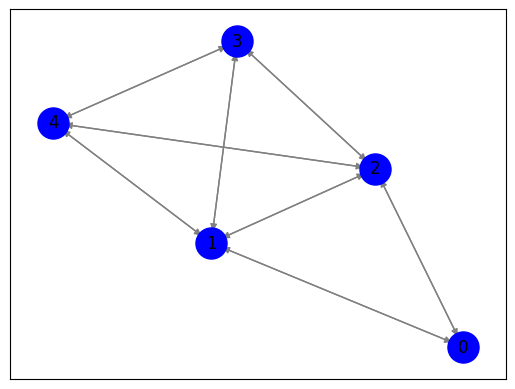

In [59]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [60]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 1: 1.0000
Node 2: 1.0000
Node 3: 0.8000
Node 4: 0.8000
Node 0: 0.6667


In [61]:
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 1: Closeness Centrality = 1.0000
Kalimat: "Pada tahap ini mereka menerima BLT DBHCHT 2023 untuk bulan Agustus dan September (2023)," kata Kepala Dinas Sosial Kabupaten Tulungagung Wahiyd Masrur di Tulungagung, Rabu (25/10/2023).Menurut dia, mekanisme penyaluran BLT DBHCHT diberlakukan bertahap.

Node 2: Closeness Centrality = 1.0000
Kalimat: Setiap warga atau keluarga penerima manfaat (KPM) mendapat hak BLT yang diambilkan dari dana bagi hasil cukai hasil tembakau itu selama sembilan bulan.

Node 3: Closeness Centrality = 0.8000
Kalimat: "Pencairan pertama pada bulan Juni dan Juli.

